In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import scipy

In [ ]:
#just function for plotting, nevermind
def moving_average(data, n):
    return np.average(data[:n])

def plotMovingAverage(data, n, label):

    """
    data - dataframe with timedata
    n - rolling window size

    """
    rolling_mean = []
    tiker = []
    for k in range(n, len(data), n):
        rol_mean = moving_average(data[k:], k)
        rolling_mean.append(rol_mean)
        tiker.append(k)

    plt.figure(figsize=(15,5))
    plt.title(label)
    plt.plot(data, label="Actual values")
    plt.plot(tiker, rolling_mean, 'g', label="Rolling mean trend: n=" + str(n), linewidth=3, color='red')
    plt.xlabel('Episode')
    plt.ylabel('Total reward')
    plt.legend(loc="lower right")
    plt.grid(True)

### $\varepsilon$-Greedy Policy:
$$
\begin{array}{l}
\pi(a|s) =
\left\{
\begin{array}{ll}
1 - \varepsilon + \varepsilon / m,& \text{ если } a \in \mathrm{argmax}_{a' \in \mathcal{A}}\, Q(s,a'),\\
\varepsilon / m,& \text{ иначе }
\end{array}
\right.
\end{array}
$$

In [ ]:
import numpy as np

def get_epsilon_greedy_action(q_values, epsilon, action_n):
    argmax_action = np.argmax(q_values)
    probs = epsilon * np.ones(action_n) / action_n
    probs[argmax_action] += 1 - epsilon
    action = np.random.choice(np.arange(action_n), p=probs)
    return action

### Q-Learning Algorithm

Let's $Q(s,a) = 0$ and $\varepsilon = 1$.

For each episode $k$ we do:

While episode not done:

1. Being in state $S_t$ do action $A_t \sim \pi(\cdot|S_t)$,
where $\pi = \varepsilon\text{-greedy}(Q)$, receive reward $R_t$  goes to state $S_{t+1}$.

2. On $(S_t,A_t,R_t,S_{t+1})$ improve $Q$:
$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha(R_t + \gamma \max\limits_{a'} Q(S_{t+1},a') - Q(S_t,A_t))
$$

Reduce $\varepsilon$

In [ ]:
def QLearning(env, episode_n, noisy_episode_n, gamma=0.99, t_max=500, alpha=0.5):
    total_rewards = np.zeros(episode_n)

    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction = np.zeros((state_n, action_n))

    for episode in range(episode_n):
        epsilon = 1 / (episode + 1)

        state = env.reset()
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)
        for _ in range(t_max):
            next_state, reward, done, _ = env.step(action)
            qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][np.argmax(qfunction[next_state])] - qfunction[state][action])

            state = next_state
            action = np.argmax(qfunction[next_state])

            total_rewards[episode] += reward

            if done:
                break

    return total_rewards

<ipython-input-279-d107b03b8058>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(tiker, rolling_mean, 'g', label="Rolling mean trend: n=" + str(n), linewidth=3, color='red')


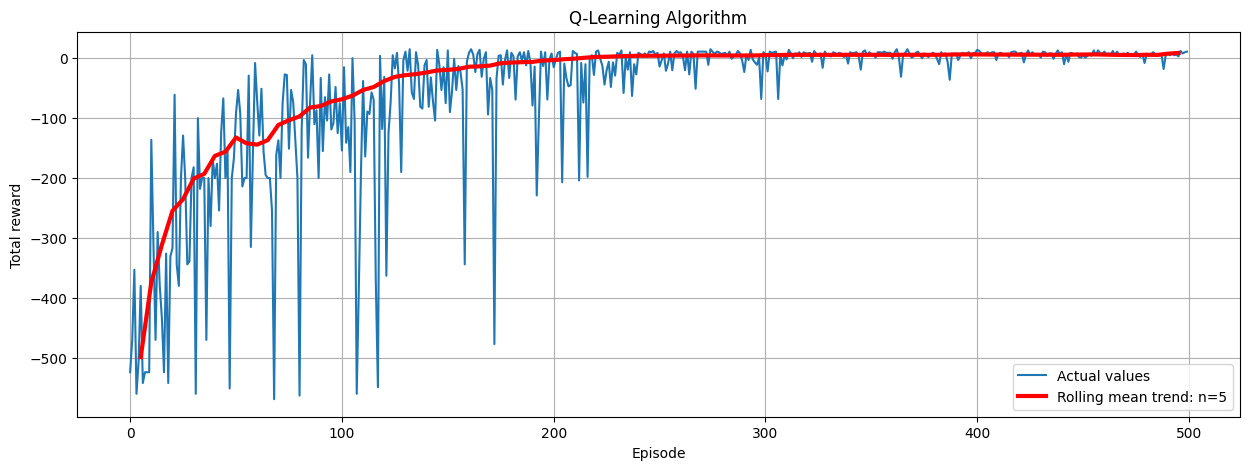

In [ ]:
total_rewards = QLearning(env, episode_n=500, noisy_episode_n=400, t_max=1000, gamma=0.999, alpha=0.5)

plotMovingAverage(total_rewards, 5, 'Q-Learning Algorithm')